In [62]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

# import pickle
# from scipy import stats
# import tensorflow as tf
# from sklearn import metrics
# from sklearn.model_selection import train_test_split

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

In [63]:
df = pd.read_csv('wearable1.csv')


In [64]:
print(df.head(5))

         Ax        Ay        Az        Gx         Gy        Gz  Sensor time
0 -0.465820  0.709961  0.703125 -8.178711   9.216309 -4.577637    204000000
1 -0.495605  0.709961  0.716797 -3.845215   0.305176 -1.159668    204000000
2 -0.507812  0.682129  0.697266 -5.126953  -7.202148  2.746582    204000000
3 -0.474609  0.687012  0.666504 -2.929688 -10.864258  1.281738    204000000
4 -0.479004  0.709473  0.658691 -2.319336  -7.141113  0.854492    204000000


In [65]:
df.describe()

,Ax,Ay,Az,Gx,Gy,Gz,Sensor time
count,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1.240000e+03
mean,-0.221472,-0.363809,0.341126,1.448059,1.400954,-6.107503,2.167613e+08
std,0.182844,0.723290,0.486758,46.051944,14.862944,31.651903,7.433284e+06
min,-1.496582,-1.993652,-0.843750,-145.568848,-95.458984,-261.230469,2.040000e+08
25%,-0.323242,-0.884399,-0.070923,-15.991211,-4.028320,-5.508423,2.100000e+08
50%,-0.222656,-0.687500,0.539062,0.244141,0.122070,-1.281738,2.170000e+08
75%,-0.102051,0.462280,0.736816,10.437012,4.898071,2.441406,2.230000e+08
max,0.406738,1.059570,1.150879,249.877930,175.537109,39.123535,2.290000e+08


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 7 columns):
Ax             1240 non-null float64
Ay             1240 non-null float64
Az             1240 non-null float64
Gx             1240 non-null float64
Gy             1240 non-null float64
Gz             1240 non-null float64
Sensor time    1240 non-null int64
dtypes: float64(6), int64(1)
memory usage: 67.9 KB


In [67]:
# getting unique Sensor times
df["Sensor time"].unique()

array([204000000, 205000000, 206000000, 207000000, 208000000, 209000000,
       210000000, 211000000, 212000000, 213000000, 214000000, 215000000,
       216000000, 217000000, 218000000, 219000000, 220000000, 221000000,
       222000000, 223000000, 224000000, 225000000, 226000000, 227000000,
       228000000, 229000000])

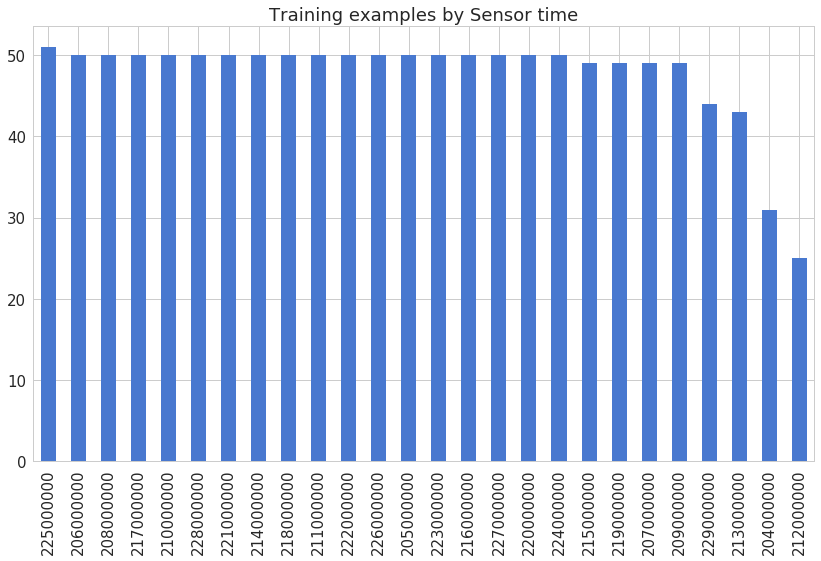

In [24]:
df['Sensor time'].value_counts().plot(kind='bar', title='Training examples by Sensor time');

In [68]:
def plot_SensorTime(time, df):
    data = df[df['Sensor time'] == time][['Ax', 'Ay', 'Az']]
    print(data)
    axis = data.plot(subplots=True, figsize=(16, 12),title=time)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

          Ax        Ay        Az
0  -0.465820  0.709961  0.703125
1  -0.495605  0.709961  0.716797
2  -0.507812  0.682129  0.697266
3  -0.474609  0.687012  0.666504
4  -0.479004  0.709473  0.658691
5  -0.489258  0.703125  0.640625
6  -0.489258  0.723145  0.653809
7  -0.493652  0.719727  0.655273
8  -0.466309  0.710938  0.648926
9  -0.434082  0.703125  0.686523
10 -0.461914  0.698242  0.690430
11 -0.467773  0.705566  0.673828
12 -0.484863  0.709961  0.665527
13 -0.479980  0.708496  0.666016
14 -0.445312  0.704102  0.691895
15 -0.466309  0.708984  0.678711
16 -0.500000  0.711914  0.653809
17 -0.466309  0.710938  0.670898
18 -0.476074  0.710449  0.672852
19 -0.504395  0.710938  0.663574
20 -0.497070  0.711914  0.666016
21 -0.468750  0.702637  0.678223
22 -0.479980  0.699707  0.677734
23 -0.486816  0.701660  0.663574
24 -0.477539  0.702148  0.670410
25 -0.483887  0.691406  0.672363
26 -0.473633  0.693848  0.671875
27 -0.493164  0.701172  0.669922
28 -0.514648  0.702637  0.665527
29 -0.4863

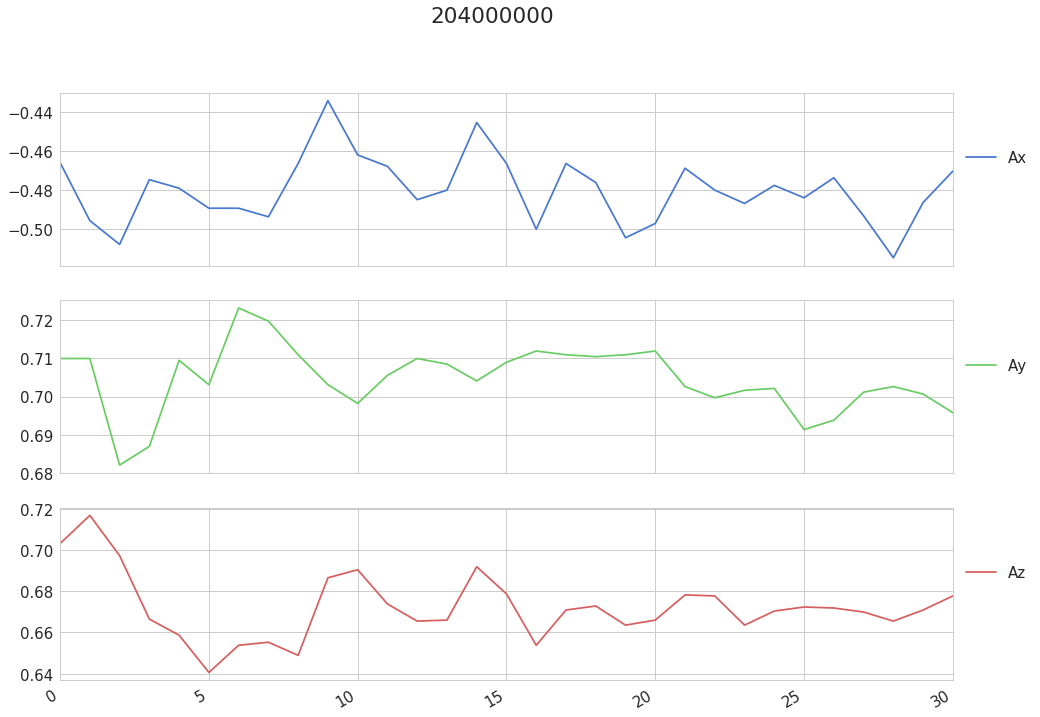

In [69]:
plot_SensorTime(204000000, df)

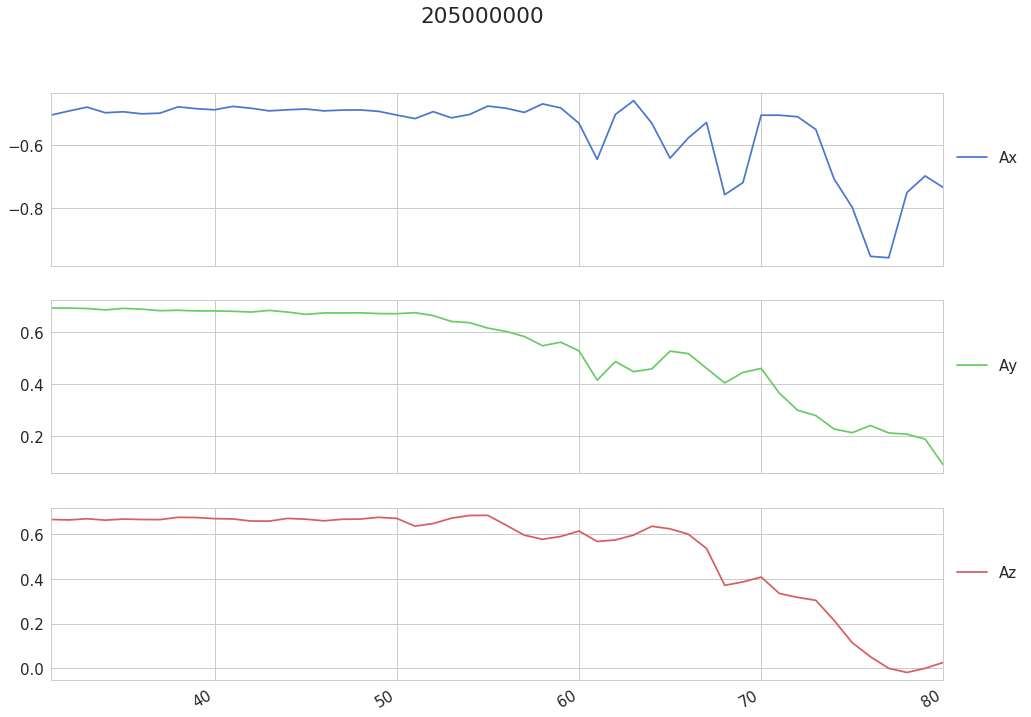

In [33]:
plot_SensorTime(205000000, df)

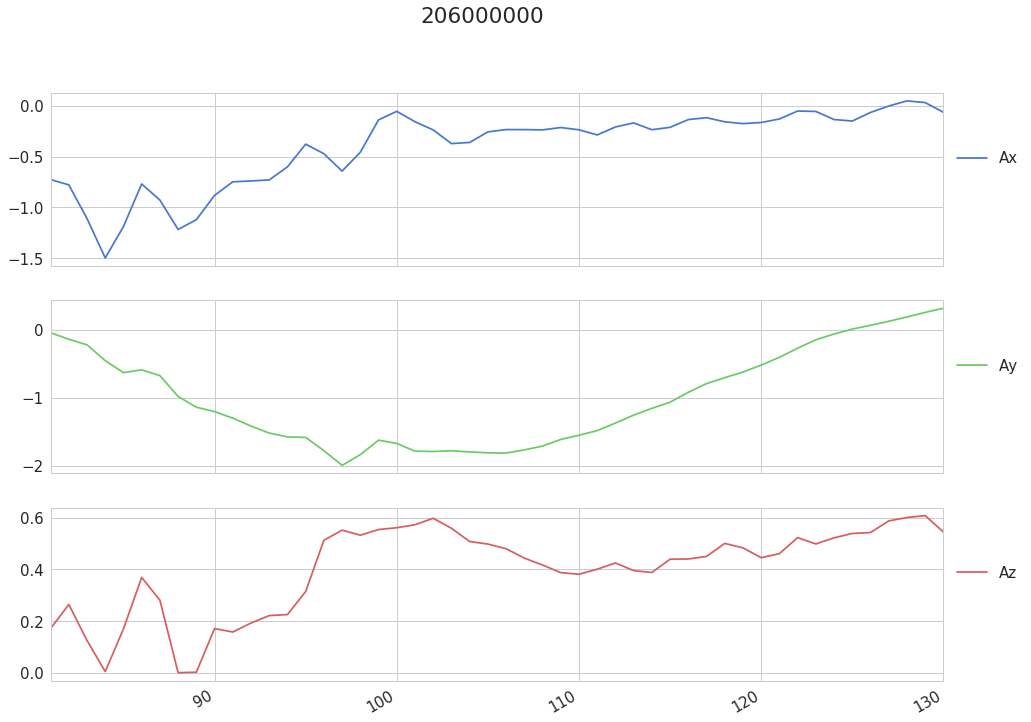

In [34]:
plot_SensorTime(206000000, df)

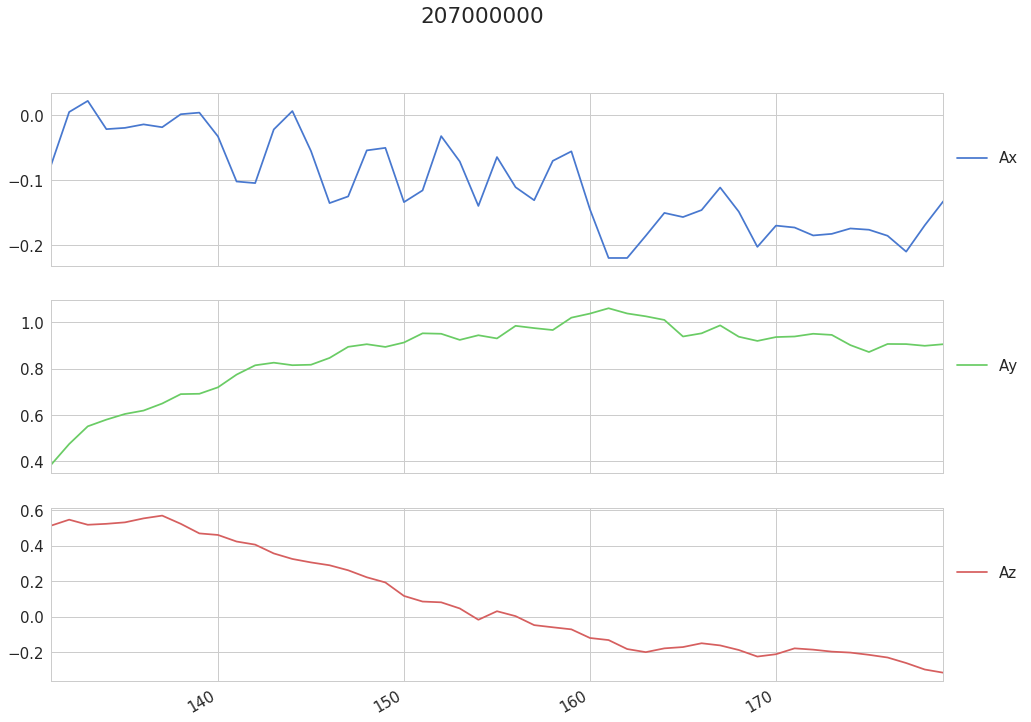

In [35]:
plot_SensorTime(207000000, df)

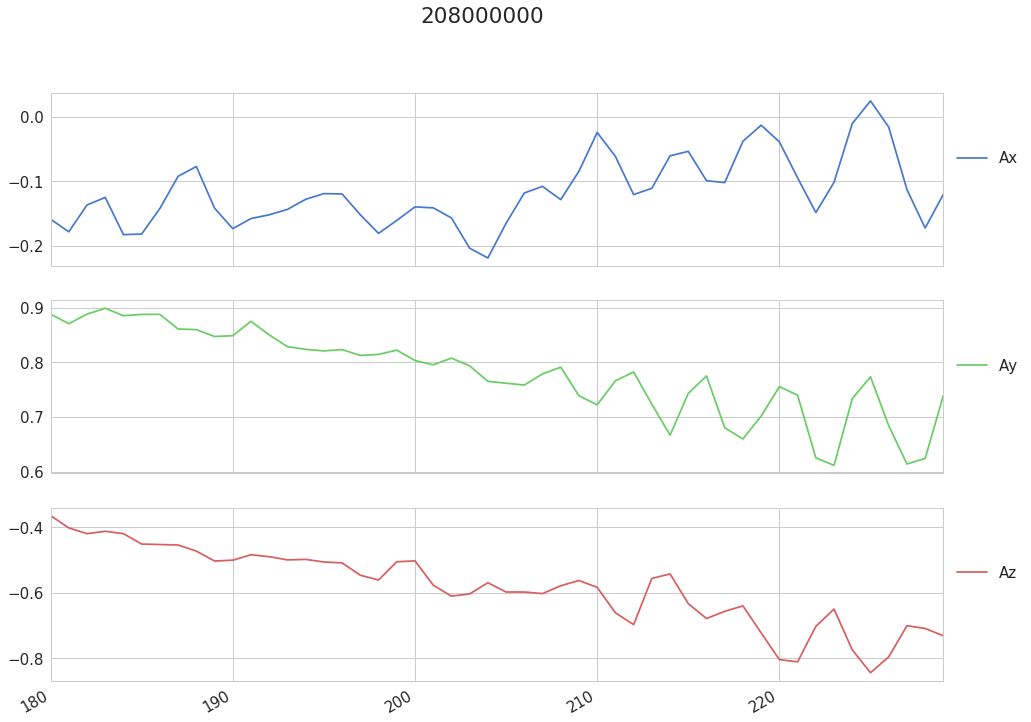

In [36]:
plot_SensorTime(208000000, df)

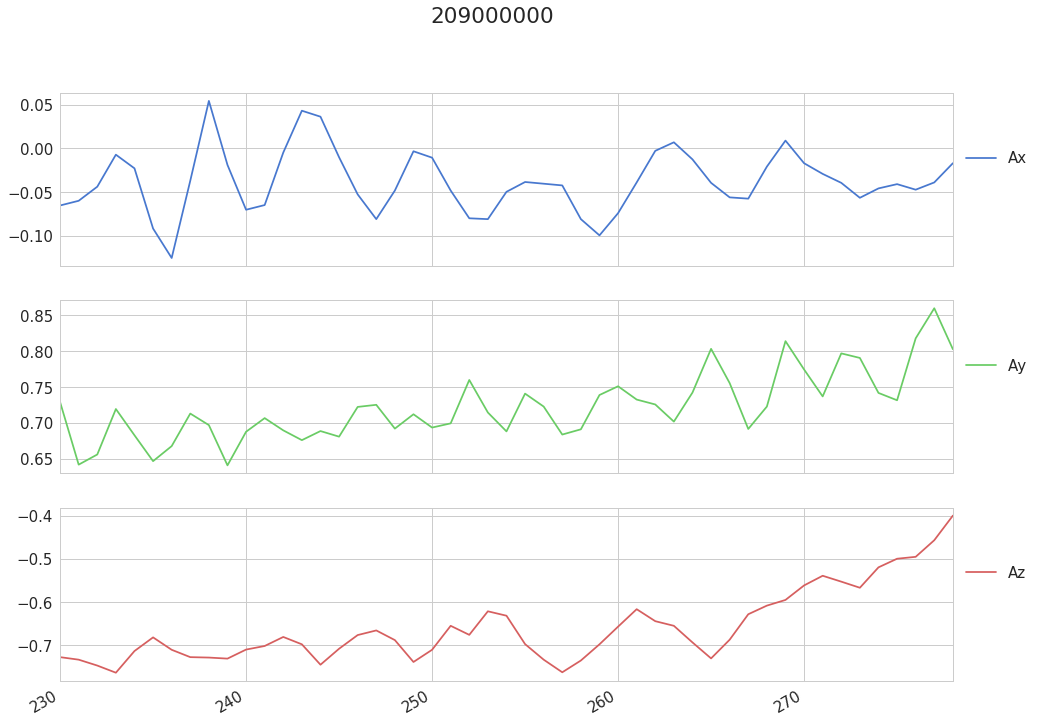

In [37]:
plot_SensorTime(209000000, df)

# plotting in 3d

In [70]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

In [84]:
def plot_SensorTime3D(time, df):
    data = df[df['Sensor time'] == time][['Ax', 'Ay', 'Az']]
    fig1 = plt.figure(1)
    mpl.rcParams['legend.fontsize'] = 10

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(data["Ax"].values,data["Ay"].values,data["Az"].values, label='Wearable1_Acc_curve')
    
    ax.legend()


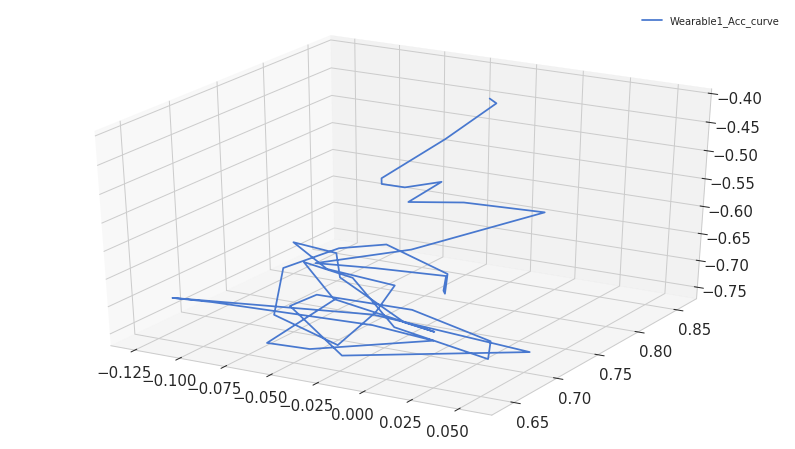

In [85]:
plot_SensorTime3D(209000000, df)

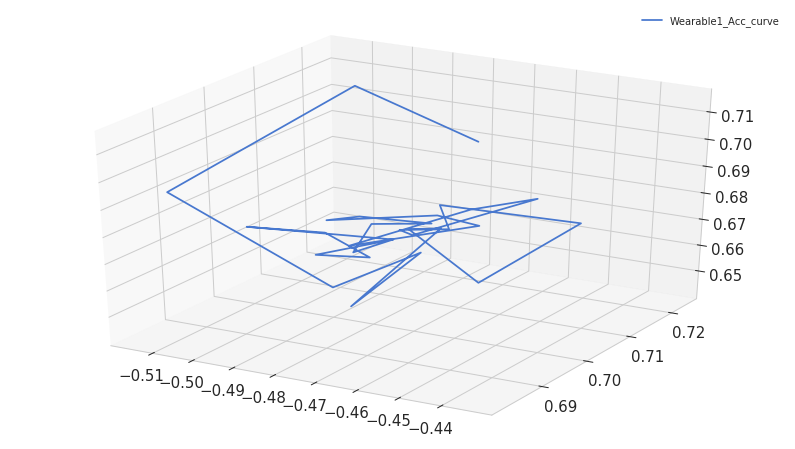

In [86]:
plot_SensorTime3D(204000000, df)

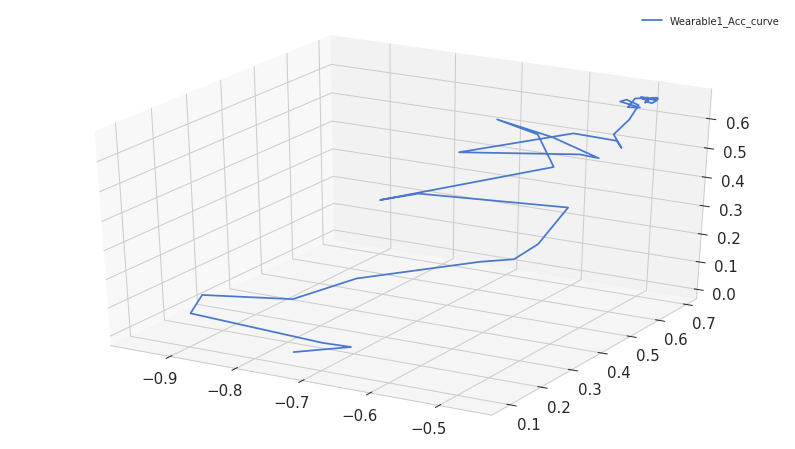

In [88]:
plot_SensorTime3D(205000000, df)

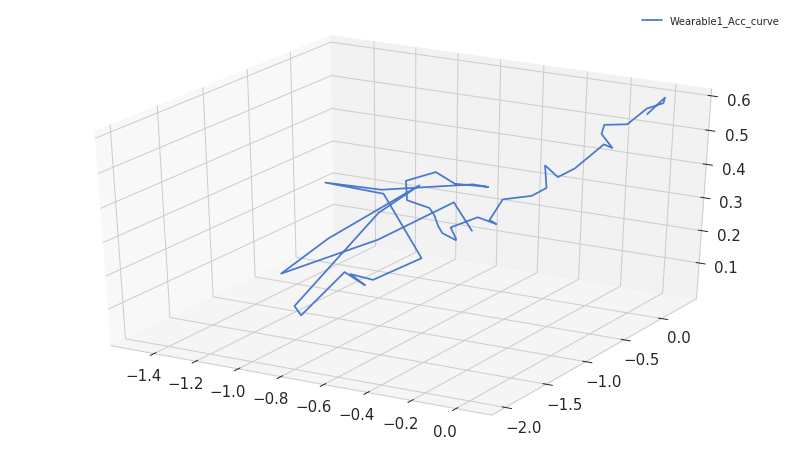

In [89]:
plot_SensorTime3D(206000000, df)

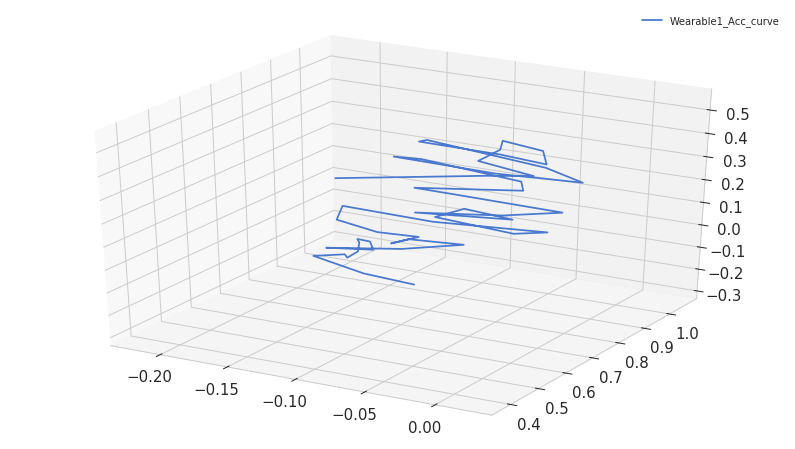

In [90]:
plot_SensorTime3D(207000000, df)

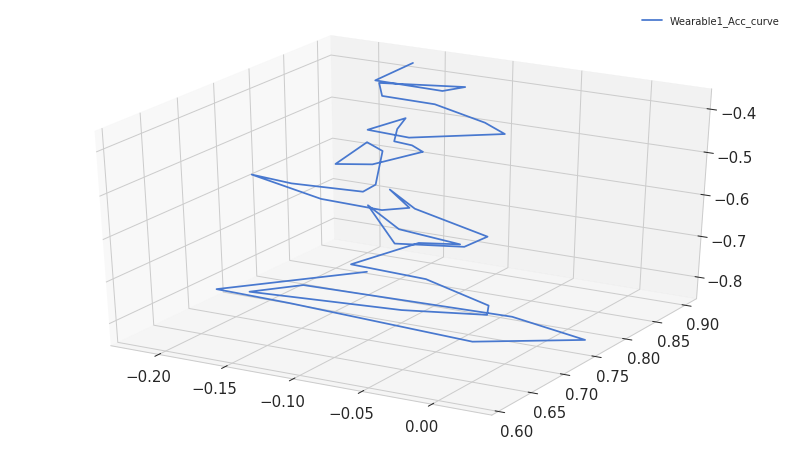

In [91]:
plot_SensorTime3D(208000000, df)

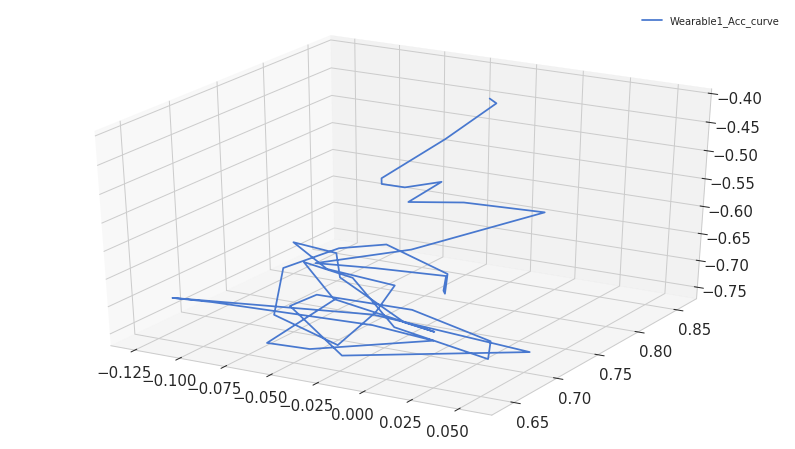

In [92]:
plot_SensorTime3D(209000000, df)

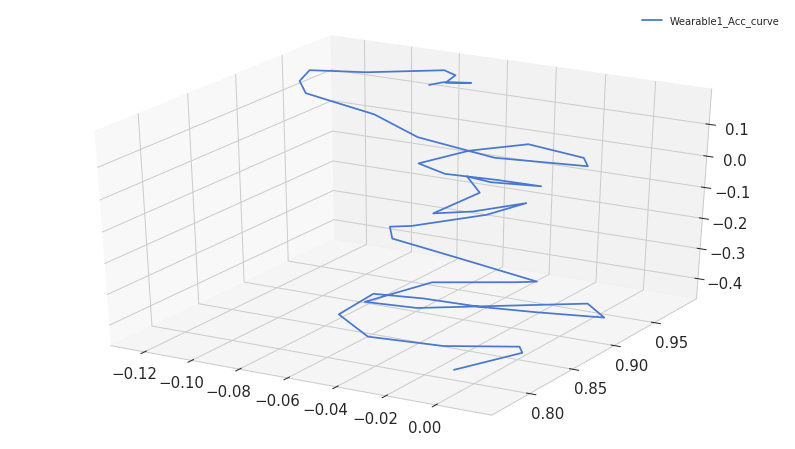

In [93]:
plot_SensorTime3D(210000000, df)

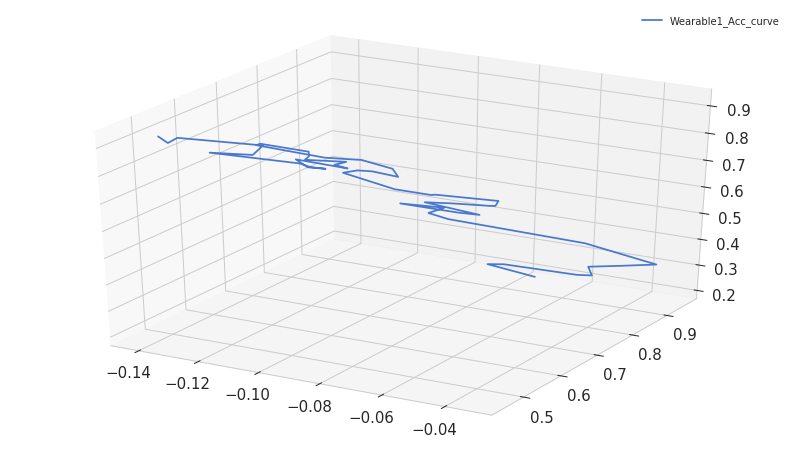

In [94]:
plot_SensorTime3D(211000000, df)

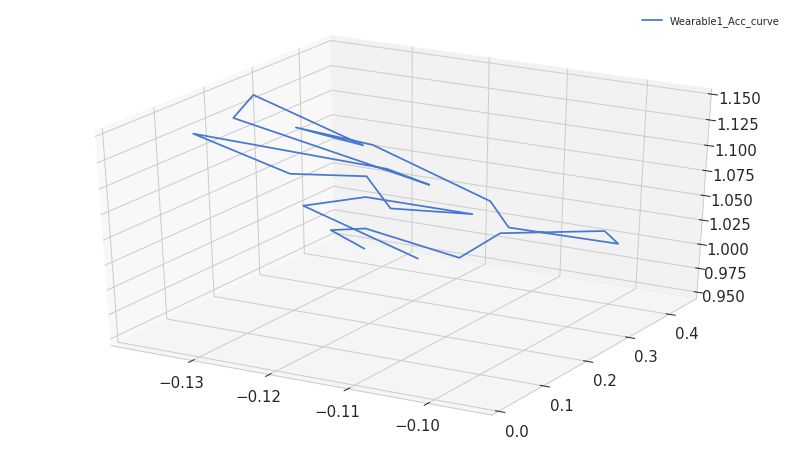

In [95]:
plot_SensorTime3D(212000000, df)

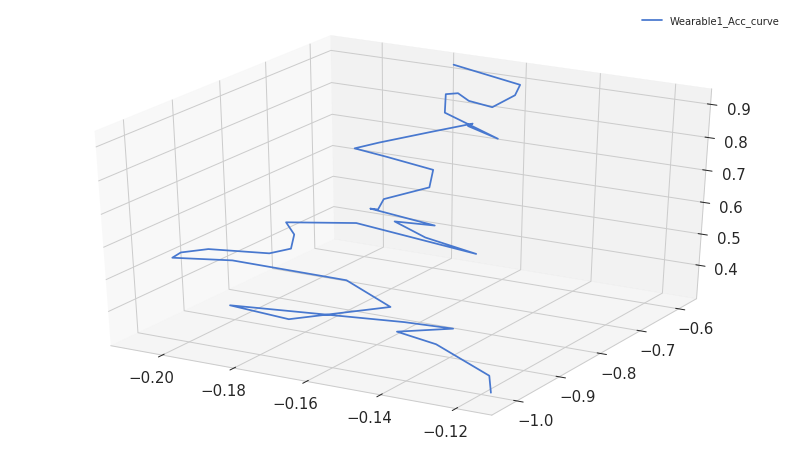

In [96]:
plot_SensorTime3D(213000000, df)

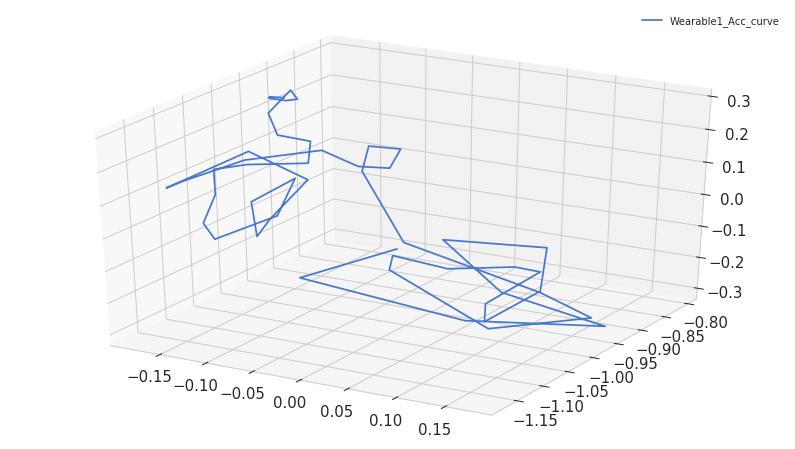

In [97]:
plot_SensorTime3D(214000000, df)

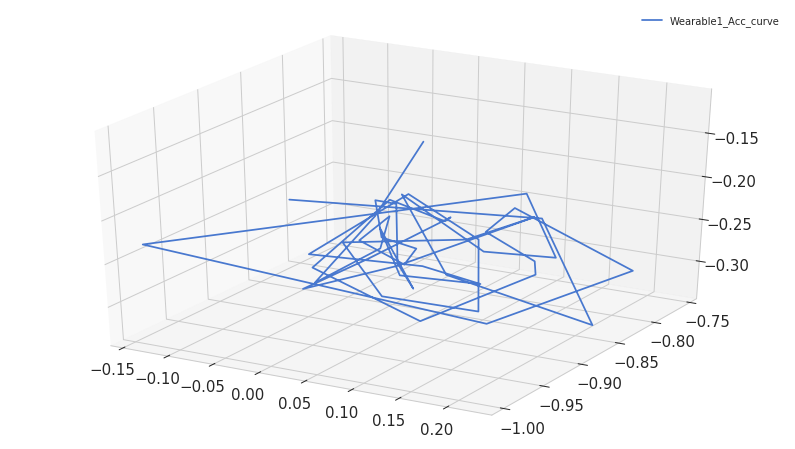

In [98]:
plot_SensorTime3D(215000000, df)

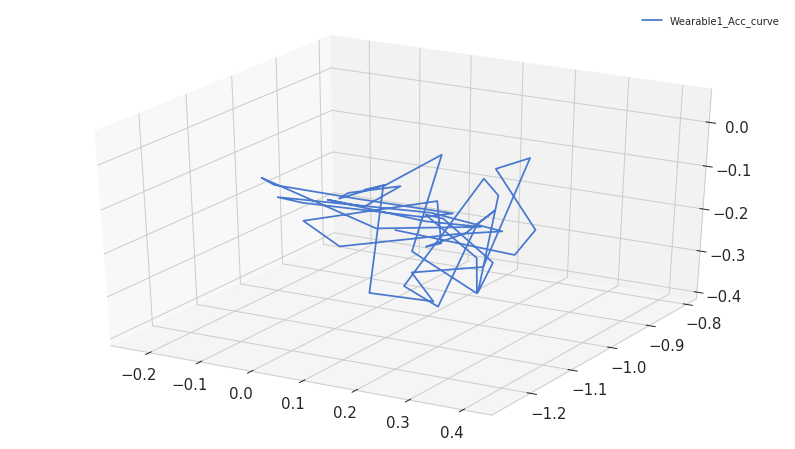

In [99]:
plot_SensorTime3D(216000000, df)